* https://www.clarifai.com/developer/guide/
* https://github.com/Clarifai/clarifai-python

`pip install clarifai --upgrade`
Version 2.3.2

In [1]:
from clarifai.rest import ClarifaiApp, ApiError
#from clarifai.rest import ApiError
import requests as rq
import os
import io
import base64
from PIL import Image
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import sys
print(sys.version)

def load_api_secrets(filename):
    """Convenience to load the API key from a json file."""
    try:
        with open(filename, 'r') as fp:
            api_params = json.load(fp)
    except Exception as e:
        print('Failed to load API secrets key: {}'.format(e))
        api_params = None
    return api_params['key']


def encode_image(image):
    """base64 encode an image stream."""
    base64_img = base64.b64encode(image)
    return base64_img

3.6.5 |Anaconda, Inc.| (default, Apr 26 2018, 08:42:37) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [2]:
encode_image(b'test')

b'dGVzdA=='

## API key
https://clarifai-python.readthedocs.io/en/latest/install/#configuration

api_key can be passed to the constructor (https://clarifai-python.readthedocs.io/en/latest/clarifai.rest/#clarifai.rest.client.ClarifaiApp). First validate the key.

In [3]:
API_key_filepath = 'Clarifai_API_key.json'
bad_API_key = load_api_secrets(API_key_filepath)
bad_API_key

'123456'

In [4]:
CLASSIFIER = 'clarifai'

def validate_api_key(api_key):
    """Check that an API key is valid, if yes return the app."""
    try:
        from clarifai.rest import ClarifaiApp, ApiError
        app = ClarifaiApp(api_key=api_key)
        return app
    except ApiError as exc:
        error = json.loads(exc.response.content)
        print(
            "%s error: %s", CLASSIFIER, error['status']['description'])
        return None

In [5]:
error = validate_api_key(bad_API_key)
error

%s error: %s clarifai API key not found


In [6]:
?error

To load my private key from desktop

In [7]:
API_key_filepath = '/Users/robincole/Desktop/Clarifai_API_key.json'
API_key = load_api_secrets(API_key_filepath)
#API_key

In [8]:
app = ClarifaiApp(api_key=API_key)  # the constructor with valid api_key
#app = ClarifaiApp()  # the constructor with api_key as an environment variable

In [9]:
# List all models
for model in app.models.get_all():
    print(model.model_name)

the/model
我的新模型
pets
Portrait Quality
Landscape Quality
Textures & Patterns
moderation
logo
focus
demographics
apparel
celeb-v1.3
face-v1.3
face-v1.3
weddings-v1.0
travel-v1.0
nsfw-v1.0
food-items-v1.0
general-v1.3
color
general-v1.3


In [10]:
general_model = app.models.get('general-v1.3')

In [11]:
file_name = 'dog.jpg'

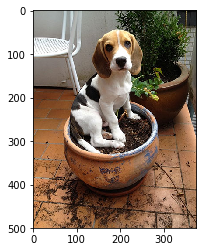

In [12]:
img = plt.imread(file_name)  # Creates an ndarray
plt.imshow(img)
plt.show()

Predict by base 64 encoded image

In [13]:
with open(file_name, "rb") as image_file:
    #encoded_string = base64.b64encode(image_file.read())
    encoded_string = encode_image(image_file.read())

In [14]:
def parse_concepts(api_concepts):
    """Parse the API concepts data."""
    return {concept['name']: round(100.0*concept['value'], 2) 
            for concept in api_concepts}

In [15]:
%%time
response = general_model.predict_by_base64(encoded_string)

CPU times: user 28.7 ms, sys: 3.41 ms, total: 32.1 ms
Wall time: 2 s


In [16]:
response

{'status': {'code': 10000, 'description': 'Ok'},
 'outputs': [{'id': '595ecc809cf34aaf9c1f7ccc48860e72',
   'status': {'code': 10000, 'description': 'Ok'},
   'created_at': '2018-10-15T05:52:07.465352601Z',
   'model': {'id': 'aaa03c23b3724a16a56b629203edc62c',
    'name': 'general-v1.3',
    'created_at': '2016-03-09T17:11:39.608845Z',
    'app_id': 'main',
    'output_info': {'message': 'Show output_info with: GET /models/{model_id}/output_info',
     'type': 'concept',
     'type_ext': 'concept'},
    'model_version': {'id': 'aa9ca48295b37401f8af92ad1af0d91d',
     'created_at': '2016-07-13T01:19:12.147644Z',
     'status': {'code': 21100, 'description': 'Model trained successfully'}},
    'display_name': 'General'},
   'input': {'id': 'cbd7cb27217a40dea148eb2be4052b04',
    'data': {'image': {'url': 'https://s3.amazonaws.com/clarifai-api/img3/prod/small/bf2f062783844800a285285a0cd43fd2/1495a57395486f693963ae0380c66ec3',
      'base64': 'dHJ1ZQ=='}}},
   'data': {'concepts': [{'id':

In [17]:
api_concepts = response['outputs'][0]['data']['concepts']
print(len(api_concepts))
for concept in api_concepts[0:2]:
    print(concept)

20
{'id': 'ai_8S2Vq3cR', 'name': 'dog', 'value': 0.9874173402786255, 'app_id': 'main'}
{'id': 'ai_4CRlSvbV', 'name': 'cute', 'value': 0.9760125279426575, 'app_id': 'main'}


In [18]:
parse_concepts(api_concepts)

{'dog': 98.74,
 'cute': 97.6,
 'no person': 97.5,
 'mammal': 97.11,
 'pet': 96.55,
 'funny': 94.83,
 'canine': 94.46,
 'portrait': 94.42,
 'animal': 93.64,
 'wood': 92.57,
 'sit': 92.3,
 'puppy': 91.4,
 'domestic': 91.12,
 'little': 90.75,
 'indoors': 89.88,
 'adorable': 89.31,
 'young': 89.04,
 'looking': 85.08,
 'one': 84.55,
 'humor': 81.03}

In [32]:
MOCK_RESPONSE = {'status': {'description': 'Ok'},
                 'outputs': [{'data': {'concepts': [{'name': 'dog',
                                                    'value': 0.85432},
                                                   {'name': 'cat',
                                                    'value': 0.14568}]}}]}                       

In [34]:
parse_concepts(MOCK_RESPONSE['outputs'][0]['data']['concepts'])

{'dog': 85.43, 'cat': 14.57}

Predict by filename

In [16]:
%%time
response = general_model.predict_by_filename(filename=file_name)

CPU times: user 9.28 ms, sys: 2.42 ms, total: 11.7 ms
Wall time: 3.83 s


In [17]:
response['outputs'][0]['data']['concepts'][0]

{'id': 'ai_QhfgX2RS', 'name': 'monkey', 'value': 0.9989439, 'app_id': 'main'}

## Errors

In [22]:
MOCK_KEY_ERROR = {'status': {'description': 'API key not found'}}

class MockErrorResponse:
    """Mock Clarifai response to bad API key."""
    status_code = 404
    reason = 'Failure'
    content = json.dumps({'status': {'description': 'API key not found'}})
    
    def json(self): 
        return {}

resource = 'https://www.mock.com/url'
params = {}
method = 'GET'
response = MockErrorResponse()

error = ApiError(resource, params, method, response)

In [23]:
raise error

ApiError: b'GET /v2/https://www.mock.com/url FAILED(1539061658.1073742). status_code: 404, reason: Failure, error_code: None, error_description: None, error_details: None\n >> Python client 2.3.2 with Python 3.6.5 on darwin\n >> GET /v2/https://www.mock.com/url\n >> REQUEST(1539061658.1073742) {}\n >> RESPONSE(1539061658.1073742) {}'

In [26]:
error_content = json.loads(error.response.content)

In [28]:
error_content['status']['description']

'API key not found'

In [5]:
import ApiError from clarifai.rest

SyntaxError: invalid syntax (<ipython-input-5-2f1c069fcf08>, line 1)

In [4]:
from clarifai import rest.ApiError as ApiError

SyntaxError: invalid syntax (<ipython-input-4-9e0a28793979>, line 1)

In [19]:
mydict = {'a':1, 'b':2, 'c':3}

In [20]:
max(mydict, key=mydict.get)

'c'